In [38]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np

In [7]:
polygon = Polygon([(1,0),(3,0),(3,2),(1,2)])
polygon.area

4.0

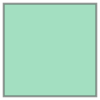

In [8]:
polygon

In [9]:
polygon.bounds

(1.0, 0.0, 3.0, 2.0)

In [10]:
poly2 = Polygon([(1,1),(2,1),(2,3),(1,3)])

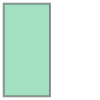

In [11]:
poly2

In [14]:
comb1 = MultiPolygon([polygon, poly2])

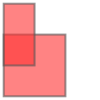

In [15]:
comb1

In [18]:
comb1.area

6.0

In [17]:
print(comb1.area)
print(poly2.area)
print(polygon.area)

6.0
2.0
4.0


In [22]:
x = polygon.intersection(poly2)

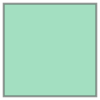

In [23]:
x

In [25]:
x.area

1.0

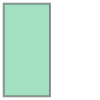

In [26]:
poly3 = Polygon([(4,1),(4,3),(5,3),(5,1)])
poly3

In [27]:
y = polygon.intersection(poly2).intersection(poly3)

In [31]:
y.area

0.0

can clearly string .intersections together, but what about with the comb1, multipolygon class.  Can we find the intersection within that?

In [32]:
comb1.intersection()

TypeError: intersection() missing 1 required positional argument: 'other'

So I'm going to have to do the following: (assuming we can't find intersection from multipoly directly, still need to look into)

Create the hirise image shapes as polygons 

Store all of them as a multipoly, by region

Within each region (and thus within each multipoly) go through and try every combination of intersecting and store the areas.  Maybe not all areas? Maybe all?  Need to maximize both the areas from the intersections and the number of the polygons (which means the maximum number of hirise images)
The above will be hard to decide before actually doing it, seeing how the overlapping areas and number of things included work out.  Maybe have it spit out the maximum number of polygons used that still have a positive area as well as the maximum area (with its associated number of polygons used), maybe top 15?  So it spits out the highest 15 areas as well as the associated number of polygons making those up?  Top 15 if there are a lot of hirise images, some regions have only 2!  maybe 15 is too much but might be a good jumping off point.  Figure out maximum number of hirise images in a region then come back to this to decide.

Naw above is too much, instead use cascaded union and combination pairs! See below link for further details:
https://gis.stackexchange.com/questions/11987/polygon-overlay-with-shapely/11990#11990

Lets create a bigger set of artifical polygons, maybe 10 of them, then mess around with optimizing.

In [39]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.random.random([])*100

95.99268605486505

In [49]:
#this creates 10 random polygons
polybucket = []
for i in np.arange(10):
    x = np.random.random([])*100
    x2 = np.random.random([])*200
    while x2 < x:
        x2 = np.random.random([])*200
    y = np.random.random([])*100
    y2 = np.random.random([])*200
    while y2 < y:
        y2 = np.random.random([])*200
    randpoly = Polygon([(x,y),(x2,y),(x2,y2),(x,y2)])
    polybucket.append(randpoly)

How to make a multipoly from the polygons within polybucket?

In [61]:
from shapely.ops import cascaded_union
from itertools import combinations

In [62]:
len(polybucket)

10

In [73]:
np.arange(len(polybucket)+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [75]:
#ignore the multipoly for now, just use polybucket
for i in np.arange(len(polybucket)+1):
    combos = combinations(polybucket, i)  #these lines give every poss. combo.
for comb in combos:
    inter = cascaded_union([comb]) 
#need to do every intersection somehow
#like comb[0].intersection(comb[1]).intersection... .intersection(comb[-1])
    
    
#cascaded union sueprceded by unary union nowadays


AttributeError: 'tuple' object has no attribute '_geom'

In [103]:
from shapely.ops import polygonize, unary_union

In [104]:
#for n = 3
polybox = ([polygon, poly2, poly3])

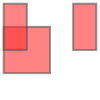

In [149]:
polyboxshape = MultiPolygon([polygon, poly2, poly3])
polyboxshape

In [105]:
polybox

In [216]:
#inter = cascaded_union([pair[0].intersection(pair[1]) for pair in combinations(shapes, 2)])
inter = cascaded_union([combo[0].intersection(combo[1]) for combo in combinations(polybox, 2)])

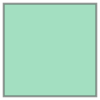

In [146]:
inter

In [108]:
inter.area

1.0

In [109]:
inter2 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]) for combo in combinations(polybox, 3)])

In [110]:
inter2

In [112]:
#seems to work right, need more illustrative example with multiple overlaps
#see best way to pick out the largest, add another polygon with overlap of area 1 and overlap of area 2

In [113]:
poly4 = Polygon([(1,1),(5,1),(5,2),(1,2)])

In [139]:
polybox2 = [polygon, poly2, poly3, poly4]

In [140]:
polybox2

In [141]:
polybox2shape = MultiPolygon([polygon, poly2, poly3, poly4])

In [279]:
polybox2shape.area

12.0

In [281]:
polybox2shape.intersection()

AttributeError: 'MultiPolygon' object has no attribute 'intersect'

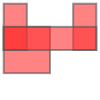

In [142]:
polybox2shape

In [214]:
inter3 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]).intersection(combo[3]) for combo in combinations(polybox2, 4)])

In [135]:
inter3 
#no results because combinations(polybox2, 4) needs all 4 in it

In [219]:
arr = [1,2,3,4]
r = 3
this = np.asarray(list(combinations(arr, r)))
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [174]:
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [175]:
print(this[0])
print(this[0][0])

[1 2 3]
1


In [199]:
#lets test on polybox2
x1 = list(combinations(polybox, 1))
x1

[(<shapely.geometry.polygon.Polygon at 0x1c8ad83f470>,),
 (<shapely.geometry.polygon.Polygon at 0x1c8ad83f160>,),
 (<shapely.geometry.polygon.Polygon at 0x1c8b0df7208>,)]

In [198]:
type(x1[0])
x1[0]

(<shapely.geometry.polygon.Polygon at 0x1c8ad83f470>,)

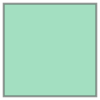

In [202]:
polybox2[0]

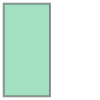

In [203]:
polybox2[1]

In [278]:
#do what we discussed
polybox2 = [polygon, poly2, poly3, poly4]
iterable = range(len(polybox2))
r = len(polybox2)
for n in iterable:
    if r > 0:
        print(r)
        comb = list(combinations(iterable,r))
        print(comb)  #literally a list object
        for item in comb:
            print(item)
            #print(len(comb[num]))
            x = item
        #y = MultiPolygon[]
            #for ele in x:
            #want like ele[0].intersection... .intersection(ele[-1])
            ele[0].intersection(ele[1]).intersection(ele[2])
        r = r-1
    else: 
        end

4
[(0, 1, 2, 3)]
(0, 1, 2, 3)
3
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)
2
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
1
[(0,), (1,), (2,), (3,)]
(0,)
(1,)
(2,)
(3,)


In [273]:
polyboxshape.append(polybox[0])

AttributeError: 'MultiPolygon' object has no attribute 'append'

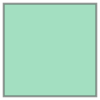

In [260]:
polybox[0]

In [244]:
y = [(0, 1, 2, 3)]

In [247]:
print(y[0])
print(y[0][0])

(0, 1, 2, 3)
0


In [288]:
print(comb)
print(len(comb))

[(0,), (1,), (2,), (3,)]
4


In [262]:
len(y)

1

In [289]:
#import dask